In [ ]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import *
from sklearn import datasets

## Load digits data

In [ ]:
digits.data.shape


(1797, 64)

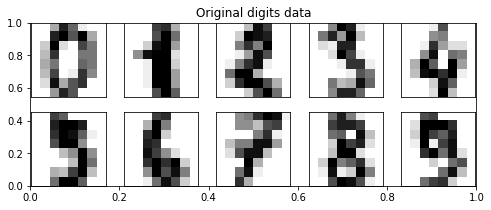

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

sampleDigits = digits.data.reshape((-1,8,8))[:10]
fig = plt.figure(figsize=(8, 3))
plt.title("Original digits data")
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(sampleDigits[i,:,:], cmap=plt.cm.binary)
plt.show()

In [ ]:
sampleDigits[0].shape

(8, 8)

### Cluster and plot digit centroids

In [ ]:
est.cluster_centers_.shape

(10, 64)

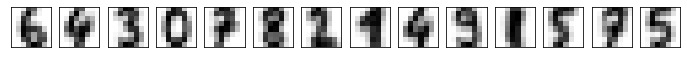

In [ ]:
n_clusters = 14

est = KMeans(n_clusters=n_clusters)
clusters = est.fit_predict(digits.data)
# est.cluster_centers_.shape

fig = plt.figure(figsize=(12, 15))
for i in range(n_clusters):
    ax = fig.add_subplot(1, n_clusters, 1 + i, xticks=[], yticks=[])
    ax.imshow(est.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
    
plt.show()

In [ ]:
# est.cluster_centers_.shape

In [ ]:
#######################################################################
### For analysis purpose only - we'll assume having the labels (SL) ###
#######################################################################
# Compute clustering accuracy
from scipy.stats import mode
from sklearn.metrics import accuracy_score

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
    
print("Digits clustering Accuracy: {}".format(accuracy_score(digits.target, labels)))

Digits clustering Accuracy: 0.7907623817473567


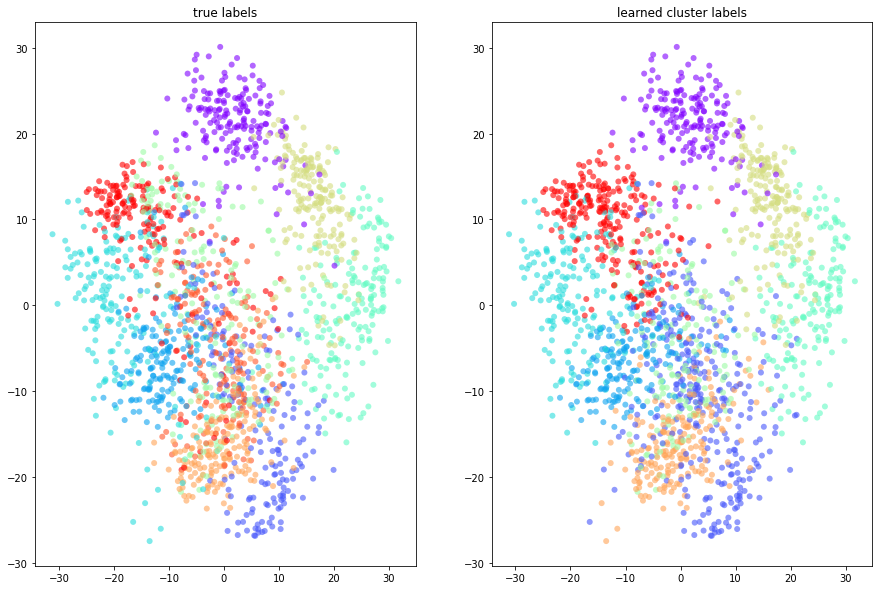

In [ ]:
# Plot clustering results
from sklearn.decomposition import PCA

X = PCA(2).fit_transform(digits.data)

kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 10),
              edgecolor='none', alpha=0.6)
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[1].scatter(X[:, 0], X[:, 1], c=labels, **kwargs)
ax[1].set_title('learned cluster labels')

ax[0].scatter(X[:, 0], X[:, 1], c=digits.target, **kwargs)
ax[0].set_title('true labels')
plt.show()

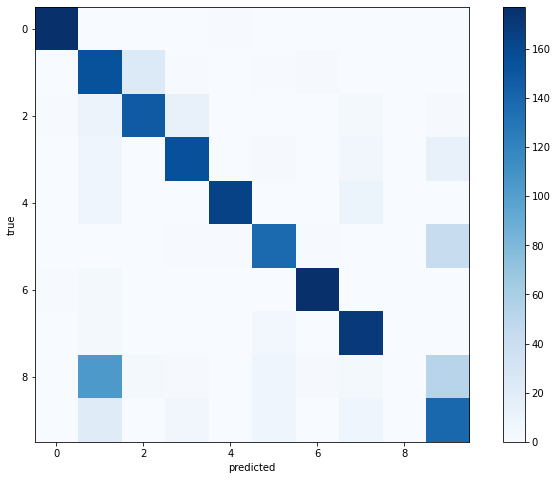

In [ ]:
from sklearn.metrics import confusion_matrix
# print(confusion_matrix(digits.target, labels))

fig = plt.figure(figsize=(12,8))
plt.imshow(confusion_matrix(digits.target, labels),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')
plt.show()

# KMeans as a Vector Quantizer 

In [ ]:
# !wget https://icc.ise.bgu.ac.il/medical_ai/tmp/holi.jpg
# !wget https://icc.ise.bgu.ac.il/medical_ai/tmp/northern.jpg
# !wget https://icc.ise.bgu.ac.il/medical_ai/tmp/tlv.jpg

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


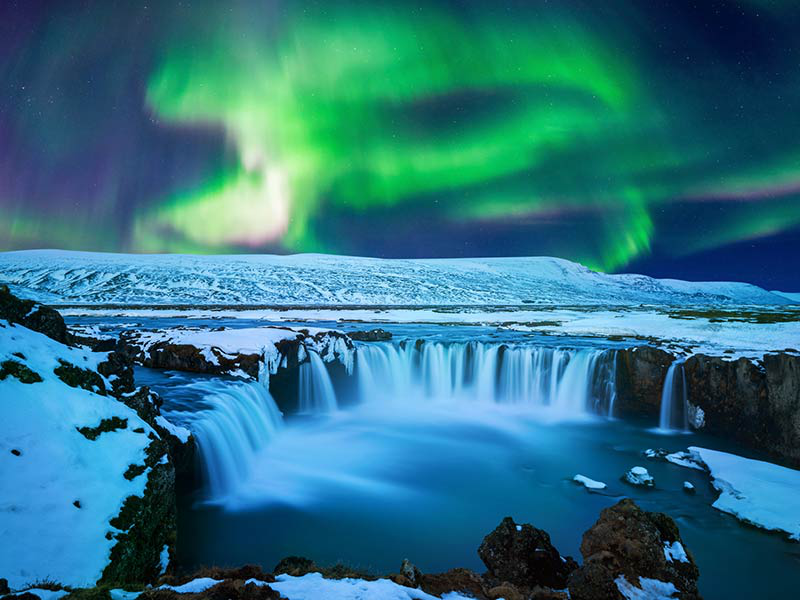

In [ ]:
from PIL import Image
# /content/drive/MyDrive/ydata/holi.jpg
im = Image.open("northern.jpg") # holi, tlv, northern
im.load()
im_np = np.asarray(im, dtype="int32")
im

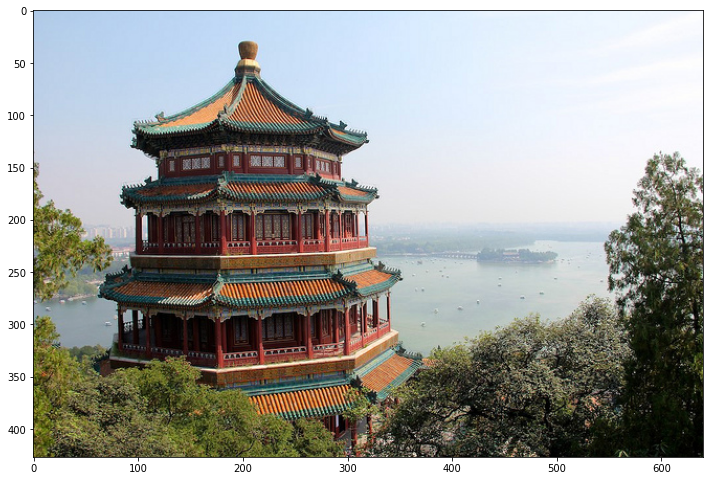

In [ ]:
from sklearn.datasets import load_sample_image
im = load_sample_image("china.jpg")

# #### use own image
# im = im_np
# ###

fig = plt.figure(figsize=(12,10))
plt.imshow(im)
plt.grid(False)
plt.show()

In [ ]:
print(im.shape)
# normalize to standard vector
X = (im / 255.0).reshape(-1, 3)
print(X.shape)

(427, 640, 3)
(273280, 3)


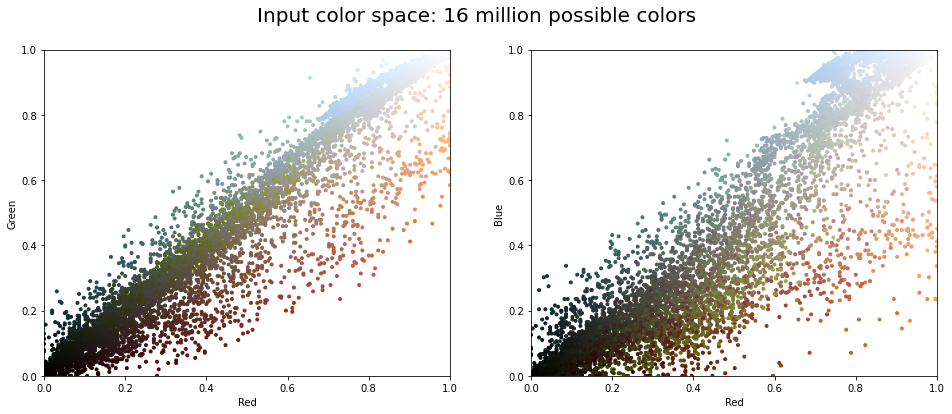

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);
    plt.show()
    
plot_pixels(X, title='Input color space: 16 million possible colors')

# Compress image by grouping similar colors using KMeans

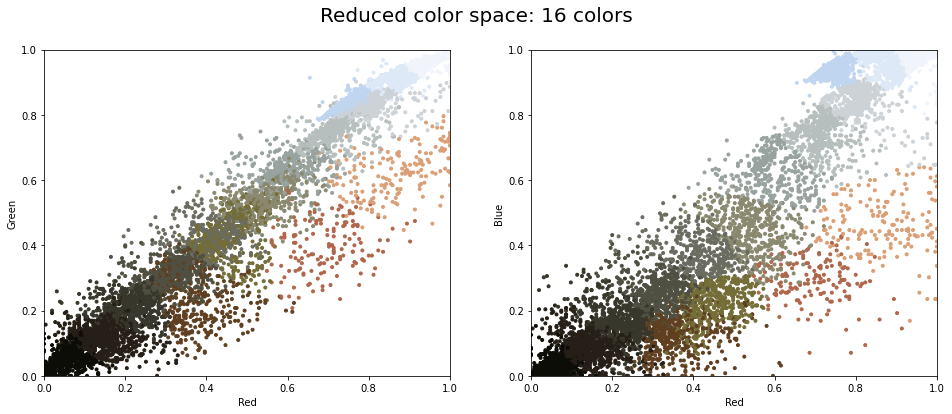

In [ ]:
# from sklearn.cluster import MiniBatchKMeans
numColors = 16

model = KMeans(numColors)
model.fit(X)
new_colors = model.cluster_centers_[model.predict(X)]

plot_pixels(X, colors=new_colors, title="Reduced color space: {} colors".format(numColors))

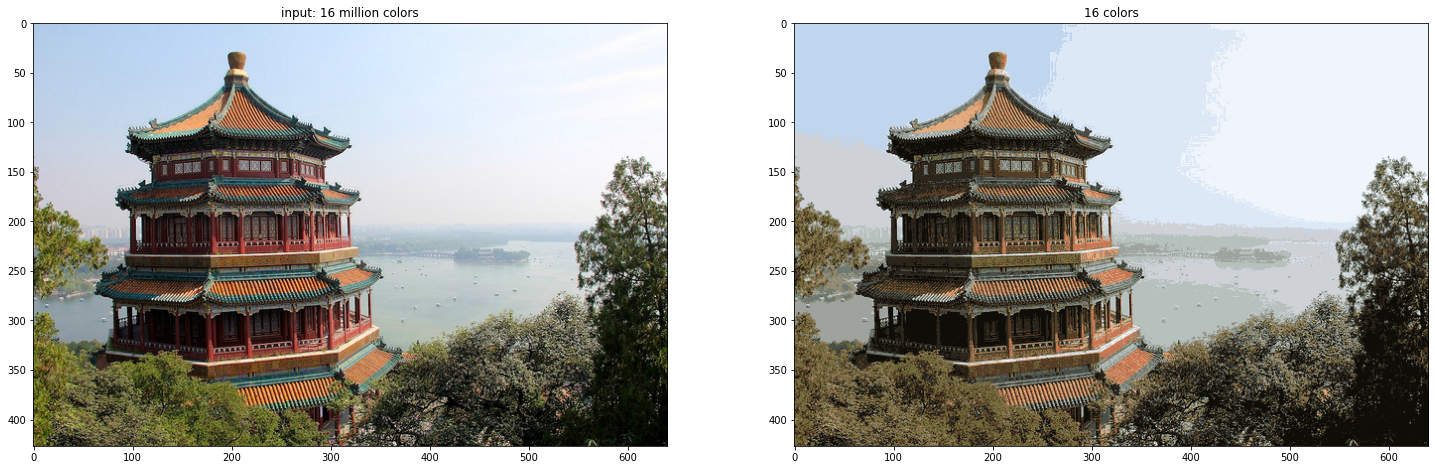

In [ ]:
# Compress 256^3 colors 
from sklearn.cluster import MiniBatchKMeans
import seaborn as sns

model = MiniBatchKMeans(numColors)
labels = model.fit_predict(X)
colors = model.cluster_centers_
new_image = colors[labels].reshape(im.shape)
new_image = (255 * new_image).astype(np.uint8)

# create and plot the new image
fig, ax = plt.subplots(1, 2, figsize=(25, 25))
with sns.axes_style('white'):
    ax[0].imshow(im)
    ax[0].set_title('input: 16 million colors')

    ax[1].imshow(new_image)
    ax[1].set_title('{0} colors'.format(numColors))
plt.show()

## Kmeans on higher dim

In [ ]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


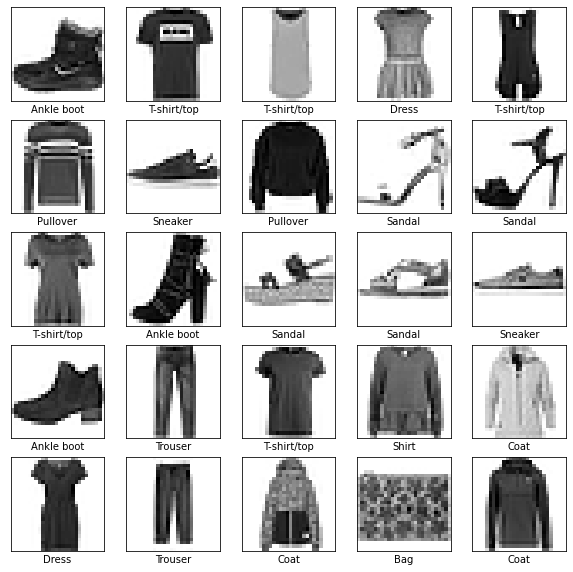

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
n_clusters=10

est = KMeans(n_clusters=n_clusters)
clusters = est.fit_predict(train_images.reshape(train_images.shape[0],-1))

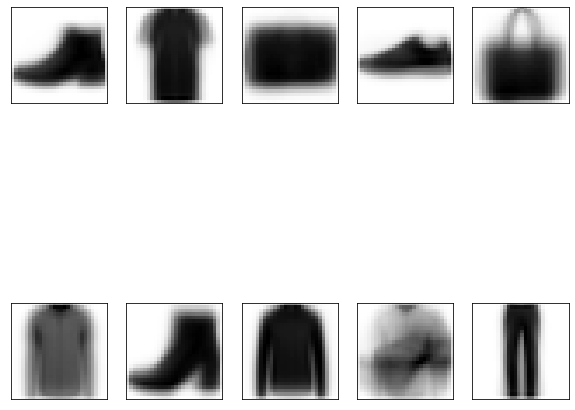

In [ ]:
plt.figure(figsize=(10,10))
for i in range(n_clusters):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(est.cluster_centers_[i].reshape((28, 28)), cmap=plt.cm.binary)
plt.show()